In [1]:
from typing import Annotated
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages
from dotenv import load_dotenv
from IPython.display import Image, display
from langgraph.graph import StateGraph
from langgraph.graph.message import add_messages
from langchain_openai import ChatOpenAI
from pydantic import BaseModel
from IPython.display import Markdown, display
from langchain.schema import SystemMessage, HumanMessage, AIMessage


import os
load_dotenv(override=True)


True

In [2]:
from langgraph.graph import StateGraph, START, END
import logging
from src.state import State
from langgraph.checkpoint.memory import MemorySaver
from src.nodes import IntentClassificationNode, QuestionAnsweringNode

# Set up Graph Builder with State
graph_builder = StateGraph(State)

# Add nodes
graph_builder.add_node("intent_classification", IntentClassificationNode())
graph_builder.add_node("question_answering", QuestionAnsweringNode())
# Set entry point
graph_builder.add_edge(START, "intent_classification")
graph_builder.add_edge("intent_classification", "question_answering")
graph_builder.add_edge("question_answering", END)



# Compile the graph
memory = MemorySaver()
graph = graph_builder.compile(checkpointer=memory)

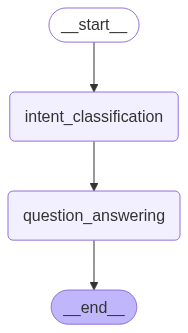

In [3]:
# Step 5: Compile the Graph
graph = graph_builder.compile()
display(Image(graph.get_graph().draw_mermaid_png()))

In [4]:
from langchain_core.messages import HumanMessage

questions = [
    "Can you tell me about the decision engine that you built?",
]

messages = [HumanMessage(content=questions[0])]
# Create proper initial state with all required fields
initial_state = {
    "messages": messages,
}

result = graph.invoke(initial_state)

response = result["messages"][-1]
response



AIMessage(content="I don't have a specific decision engine that I built, but I can provide information about decision engines in general. A decision engine typically refers to a system or software that uses algorithms to make decisions based on data inputs. These engines can analyze vast amounts of information to provide recommendations or automate decision-making processes in areas like finance, e-commerce, marketing, and healthcare.\n\nKey features often include:\n\n1. **Data Handling**: The ability to process and analyze data from various sources.\n2. **Algorithms**: Implementation of machine learning, statistical models, or business rules to generate decisions.\n3. **Integration**: The capability to connect with other systems, databases, or APIs to fetch real-time data.\n4. **User Interface**: A dashboard or UI that allows users to interact with the engine and understand its outputs.\n\nIf you have a specific context or type of decision engine in mind, feel free to ask!", additiona

In [11]:
result

{'messages': [HumanMessage(content='Can you tell me about the recommendation model you built?', additional_kwargs={}, response_metadata={}),
  AIMessage(content="The reference text describes the Supervised Decision API (S-DAPI), which is a recommendation engine designed to optimize user engagement by personalizing website experiences toward specific goals, such as increasing clicks or revenue per view. \n\nHere's a summary of how S-DAPI works:\n\n1. **Data Collection**: Initially, S-DAPI serves all available assets randomly to collect data on user interactions.\n\n2. **Thompson Sampling**: After gathering enough data, it starts optimizing for the best-performing asset using Thompson Sampling, a Bayesian approach to decision-making.\n\n3. **Personalization with Machine Learning**: Once the optimization process is established, S-DAPI introduces a machine learning model that personalizes ad placements based on user data, content tags, and other contextual information.\n\n4. **Recalibratio

In [23]:
messages.append(response)
user_query = "Can you tell me if the model increased user engagement?"
messages.append(HumanMessage(content=user_query))

state = {
    "messages": messages,
}

result = graph.invoke(state)

response = result["messages"][-1]
response


IntentClassificationNode: Processing state with keys: dict_keys(['messages', 'next', 'intent'])
IntentClassificationNode: Last message: Can you tell me more about the AI-generated content tags used in the recommendation model?
IntentClassificationNode: Classified intent: recommendation model question
IntentClassificationNode: Next node: question_answering
QuestionAnsweringNode: Processing state with keys: dict_keys(['messages', 'next', 'intent'])
QuestionAnsweringNode: Intent: recommendation model question
QuestionAnsweringNode: Generated answer of length 841


AIMessage(content="The reference text does not provide detailed information specifically about the AI-generated content tags used in the recommendation model (S-DAPI). However, it does mention that these tags are part of the inputs that help the model determine the optimal driver (advertisement) to show to a visitor. \n\nIn general, AI-generated content tags are likely to include information extracted from the content itself, which may help in understanding the context and relevance of a webpage or advertisement to a user's preferences. These tags might involve techniques such as hierarchical clustering and named entity recognition (NER) to delineate and categorize different aspects of the content that could be relevant for personalization.\n\nIf you need specific details beyond the provided reference text, please let me know, and I can assist further!", additional_kwargs={}, response_metadata={})

In [75]:

class State(BaseModel):

    messages: Annotated[list, add_messages]


In [76]:
graph_builder = StateGraph(State)

In [77]:
def our_first_node(old_state: State) -> State:

    reply = f"{random.choice(nouns)} are {random.choice(adjectives)}"
    messages = [{"role": "assistant", "content": reply}]

    new_state = State(messages=messages)

    return new_state

graph_builder.add_node("first_node", our_first_node)

In [78]:
graph_builder.add_edge(START, "first_node")
graph_builder.add_edge("first_node", END)

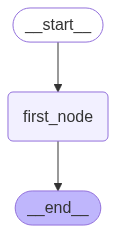

In [80]:
graph = graph_builder.compile()
display(Image(graph.get_graph().draw_mermaid_png()))

In [34]:
class MarkdownReader:
    def __init__(self, directory_path: str):
        self.directory_path = directory_path
        if not os.path.exists(directory_path):
            raise ValueError(f"Directory {directory_path} does not exist")

    def read_markdown_files(self) -> str:
        """
        Reads all markdown files in the specified directory and combines their content.
        
        Returns:
            str: Combined content of all markdown files
        """
        combined_content = []
        
        for filename in os.listdir(self.directory_path):
            if filename.endswith(('.md', '.markdown')):
                file_path = os.path.join(self.directory_path, filename)
                try:
                    with open(file_path, 'r', encoding='utf-8') as f:
                        content = f.read()
                        combined_content.append(content)
                except Exception as e:
                    print(f"Error reading file {filename}: {str(e)}")
        return '\n\n'.join(combined_content)
    
mr = MarkdownReader(directory_path='./data/projects/decision-api')
content = mr.read_markdown_files()
print(content)

# rvo-sdapi-models
Supervised Decision API (SDAPI) is a decision engine that leverages Make user data and AI generated content tags to determine the best ad. The model aims to both increase user engagement (e.g. clicks, views, purchases, etc.) and to reduce the manual effort needed to test and target Mario drivers. 

## Run notebooks / jobs
-  Train jobs / notebooks require:
    - Databricks runtime 15.4.15 ML
-  Deploy jobs / notebooks require:
    - Databricks runtime 11.3.55 ML
    - Install: dbfs:/Libraries/Python/model-registry-python/model_registry_python-v1.2.7-py3-none-any.whl

2. Register a client with `Model Registry-prod (PROD)`, `Jarvis API-prod (PROD)`, and `Jarvis API-dev (DEV) in Pontifex to be able to acquire a bearer token.

## Sample request data
- Sample input request
   ```json
    [
    {
        "key": "anonymousId",
        "value": "b51099ff-e704-4dc9-9a08-1fb2a5accd76"
    },
    {
        "key": "context",
        "value": "{\"audiences\":[],\"day_of_week\":\"

In [35]:
class RecommendationWorkAgent:
    def __init__(self, 
                 system_prompt,
                 model_name="gpt-4o-mini"):
        self.reader = MarkdownReader('./data/projects/decision-api')
        self.content = self.reader.read_markdown_files()
        self.system_prompt = system_prompt
        self.llm = ChatOpenAI(model=model_name)
        self.message_list = None
        
    def init_message_list(self, user_query: str) -> list:
        self.message_list = [
            SystemMessage(content=self.system_prompt),
            HumanMessage(content=user_query),
            ]
    
    def answer_question(self, user_query: str) -> str:
        """
        Answers user questions about recommendation model projects.
        
        Args:
            user_query (str): The user's question
            
        Returns:
            str: Response based on the content
        """
        if self.message_list is None:
            self.init_message_list(user_query)
        response = self.llm.invoke(self.message_list)
        self.message_list.append(AIMessage(content=response.content))
        return response.content

In [61]:
system_prompt_template = """You are an expert at building recommendation engines using contextual bandit models.
    When responding to a user, you should use the reference text and chat history to guide your response.
    Please tell the user when you are basing your answer on information that is not in the reference text.
    Please read the query, reference text, and response history carefully before determining your response.
    The reference text is provided below:
    [BEGIN DATA]
    ************
    [Reference text]: {reference_text}
    ************
    [END DATA]
    """
system_prompt = system_prompt_template.format(reference_text=content)
user_query = "Can you explain how the model handles the explore / exploit trade off"
messages_list = [
    SystemMessage(content=system_prompt),
    HumanMessage(content=user_query),
    ]


In [62]:
llm = ChatOpenAI(model="gpt-4o-mini")
response = llm.invoke(messages_list)
display(Markdown(response.content))

The model handles the explore/exploit trade-off through a systematic approach involving Thompson Sampling. Here’s a summary of how it works:

1. **Initial Exploration**: S-DAPI starts by randomly serving all available assets to collect data. This helps in understanding which assets might perform better in terms of user engagement (e.g., clicks, purchases).

2. **Optimizing for Best Asset**: After collecting sufficient data, S-DAPI transitions to optimizing for the single overall-best asset using Thompson Sampling. This statistical method allows the model to balance exploration (testing out different options) and exploitation (choosing the best-performing option based on current data).

3. **Introducing Personalization**: Once enough data is gathered, S-DAPI introduces a machine learning model to show personalized ads based on user data and content tags. This personalized model is treated as an additional arm in the bandit framework.

4. **Dynamic Calibration**: S-DAPI continuously calibrates how often to use the machine learning model compared to the best asset found so far. If the personalized model demonstrates strong performance, it starts to serve personalized ads more frequently. Conversely, if confidence in the model decreases, S-DAPI recalibrates to prioritize testing the best overall asset again.

5. **Avoiding Poor Performance**: S-DAPI's recalibration feature ensures that it never converges to a solution that performs worse than a traditional A/B test would conclude. This approach preserves the balance between exploring new options and exploiting known successful assets over time.

This strategy enables S-DAPI to personalize user experiences effectively while minimizing the manual effort typically needed for monitoring A/B tests.

In [63]:
messages_list.append(AIMessage(content=response.content))
messages_list

[SystemMessage(content='You are an expert at building recommendation engines using contextual bandit models.\n    When responding to a user, you should use the reference text and chat history to guide your response.\n    Please tell the user when you are basing your answer on iformation that is not in the reference text.\n    Please read the query, reference text, and response history carefully before determining your response.\n    The reference text is provided below:\n    [BEGIN DATA]\n    ************\n    [Reference text]: # rvo-sdapi-models\nSupervised Decision API (SDAPI) is a decision engine that leverages Make user data and AI generated content tags to determine the best ad. The model aims to both increase user engagement (e.g. clicks, views, purchases, etc.) and to reduce the manual effort needed to test and target Mario drivers. \n\n## Run notebooks / jobs\n-  Train jobs / notebooks require:\n    - Databricks runtime 15.4.15 ML\n-  Deploy jobs / notebooks require:\n    - Dat

In [64]:
new_user_query = """How does the model recalibrate?"""
messages_list.append(HumanMessage(content=new_user_query))
messages_list


[SystemMessage(content='You are an expert at building recommendation engines using contextual bandit models.\n    When responding to a user, you should use the reference text and chat history to guide your response.\n    Please tell the user when you are basing your answer on iformation that is not in the reference text.\n    Please read the query, reference text, and response history carefully before determining your response.\n    The reference text is provided below:\n    [BEGIN DATA]\n    ************\n    [Reference text]: # rvo-sdapi-models\nSupervised Decision API (SDAPI) is a decision engine that leverages Make user data and AI generated content tags to determine the best ad. The model aims to both increase user engagement (e.g. clicks, views, purchases, etc.) and to reduce the manual effort needed to test and target Mario drivers. \n\n## Run notebooks / jobs\n-  Train jobs / notebooks require:\n    - Databricks runtime 15.4.15 ML\n-  Deploy jobs / notebooks require:\n    - Dat

In [65]:
response = llm.invoke(messages_list)
messages_list.append(AIMessage(content=response.content))
display(Markdown(response.content))

The model recalibrates by adjusting the frequency with which it uses the machine learning model in relation to the overall best asset that has been identified. Here’s how the recalibration process works in S-DAPI:

1. **Performance Monitoring**: The model continuously monitors the performance of both the machine learning personalized model and the current best-performing asset identified through previous data.

2. **Confidence in the Model**: If the personalized model is exhibiting good predictive performance and providing higher estimated probabilities of reward, S-DAPI will start to increase the frequency of serving personalized ads.

3. **Response to Decreased Confidence**: If at any point the performance of the personalized model declines—suggesting a lack of confidence in its predictions—S-DAPI's recalibration feature acts automatically. It will decrease the frequency of the personalized model’s usage and revert to serving the overall best asset more often.

4. **Ensuring Better Outcomes**: This dynamic recalibration mechanism ensures that S-DAPI never performs worse than traditional A/B testing methods over the long term. By allowing flexibility in the ratio of exploration versus exploitation, S-DAPI can adapt to changing conditions and user behaviors.

In essence, the recalibration process allows S-DAPI to maintain an optimal balance between utilizing the most effective personalized strategies and ensuring robust performance by leveraging the best-known options.

In [66]:
messages_list.append(HumanMessage(content="Can you tell me more about the personalization aspect of the model?"))
response = llm.invoke(messages_list)
messages_list.append(AIMessage(content=response.content))
display(Markdown(response.content))

The personalization aspect of the S-DAPI model is achieved through the use of a sophisticated machine learning approach that tailors the user experience based on individual user data and content characteristics. Here are the key elements that define the personalization process:

1. **Input Features for Personalization**: The personalized model incorporates various input features to make informed decisions. These include:
   - Geo-location data of the user.
   - The time of visit.
   - Attributes related to audience segments (make audiences).
   - Odysseus propensity scores.
   - AI-generated content tags that describe the available options.

2. **Stacked Model Structure**: The personalized model consists of a stacked architecture comprising four different classification models. All models share the same inputs but are designed to learn different patterns associated with user behavior and content effectiveness.

3. **Target Encoding**: Given the complexity and high dimensionality of potential content tags, the model employs target encoding. This technique helps reduce dimensionality and facilitates the capture of interactions between different content types and drivers, improving the model's ability to make accurate predictions.

4. **Context Similarity Calculation**: The model assesses the similarity between the current page title and the descriptions of different ads or drivers. This contextual analysis informs which ads may be more relevant or appealing to the user at that moment.

5. **Thompson Sampling for Personalization**: When making decisions about which asset to show, S-DAPI uses Thompson Sampling to weigh the probability of reward from each eligible driver based on the personalized user data. This probabilistic approach helps balance the exploitation of known effective options with the exploration of potentially better alternative ads.

6. **Dynamic Serving Adjustment**: As S-DAPI gathers data on the effectiveness of personalized ads, it dynamically adjusts the frequency of personalized serving. If the personalized model performs well, it will be shown more often; if confidence wanes, the model recalibrates to fall back on the best-performing non-personalized options.

The overall goal of personalization in S-DAPI is to enhance user engagement—whether through clicks, views, or purchases—by delivering content that is more relevant and appealing to individuals based on their unique characteristics and behavior patterns. This approach reduces manual targeting efforts while maximizing the effectiveness of advertising strategies.

In [73]:
from langgraph.graph import StateGraph, START, END
import logging
import src.tools as tools
from src.state import State
from langgraph.prebuilt import ToolNode, tools_condition
from langgraph.checkpoint.memory import MemorySaver



# Set up Graph Builder with State
graph_builder = StateGraph(State)
# Add nodes
graph_builder.add_node("tools", ToolNode(tools=tools))
graph_builder.add_conditional_edges("tools", ToolNode(tools=tools))
# Add Edges
def tool_router(state: State) -> str:
    last_message = state["messages"][-1]
    
    if hasattr(last_message, "tool_calls") and last_message.tool_calls:
        return "tools"
    else:
        return None


    
# graph_builder.add_conditional_edges("tools", tool_router, {"tools": "tools"})
graph_builder.add_edge(START, "tools")

# Compile the graph
memory = MemorySaver()
graph = graph_builder.compile(checkpointer=memory)

TypeError: 'module' object is not iterable

In [ ]:
rwa = RecommendationWorkAgent()
rwa.answer_question("What is the purpose of the project?")

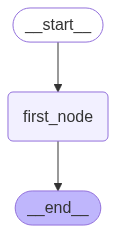

In [11]:
display(Image(graph.get_graph().draw_mermaid_png()))